
# Inference and Validation

In [104]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [122]:
#defining the model
import torch.nn.functional as F
from torch import nn,optim
class Classifier (nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        self.dropout = nn.Dropout(p=0.2)
    def forward (self,x):
        x = x.view(x.shape[0],-1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x),dim=1)
        return x
model = Classifier()
model

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [25]:
model = Classifier()
images,labels = next(iter(testloader))
ps = torch.exp(model(images))
print(ps.shape)

torch.Size([64, 10])


In [71]:
top_p,top_class = ps.topk(1,dim=1)

#print(top_class[0:10,0:1])
equals = top_class == labels.view(top_class.shape)
#print(equals)
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(accuracy)
print(f'Accuracy:{accuracy.item()*100}%')

tensor(0.0469)
Accuracy:4.6875%


In [116]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.003)

epoch = 30 
train_losses, test_losses = [], []
for i in range(epoch):
    running_loss =0
    for images,labels in trainloader:
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images,labels in testloader:
                logos = model(images)
                test_loss += criterion(logos,labels)
                
                ps = torch.exp(logos)
                top_p,top_class = ps.topk(1,dim=1)
                equal = top_class ==  labels.view(*top_class.shape)
                accuracy += torch.mean(equal.type(torch.FloatTensor))
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch:{}/{}".format(i+1,epoch),
              "Training loss: {:.3f}".format(running_loss/len(trainloader)),
              "Test Loss :{:.3f}".format(test_loss/len(testloader)),
              "Test ccuracy : {:.3f}".format(accuracy/len(testloader))
             )
            
        

Epoch:1/30 Training loss: 2.153 Test Loss :1.804 Test ccuracy : 0.358
Epoch:2/30 Training loss: 1.342 Test Loss :0.983 Test ccuracy : 0.652
Epoch:3/30 Training loss: 0.837 Test Loss :0.756 Test ccuracy : 0.731
Epoch:4/30 Training loss: 0.690 Test Loss :0.668 Test ccuracy : 0.750
Epoch:5/30 Training loss: 0.625 Test Loss :0.629 Test ccuracy : 0.762
Epoch:6/30 Training loss: 0.586 Test Loss :0.590 Test ccuracy : 0.784
Epoch:7/30 Training loss: 0.557 Test Loss :0.567 Test ccuracy : 0.795
Epoch:8/30 Training loss: 0.532 Test Loss :0.547 Test ccuracy : 0.801
Epoch:9/30 Training loss: 0.511 Test Loss :0.531 Test ccuracy : 0.809
Epoch:10/30 Training loss: 0.494 Test Loss :0.515 Test ccuracy : 0.816
Epoch:11/30 Training loss: 0.479 Test Loss :0.501 Test ccuracy : 0.819
Epoch:12/30 Training loss: 0.468 Test Loss :0.490 Test ccuracy : 0.825
Epoch:13/30 Training loss: 0.456 Test Loss :0.483 Test ccuracy : 0.825
Epoch:14/30 Training loss: 0.447 Test Loss :0.472 Test ccuracy : 0.831
Epoch:15/30 Tra

In [117]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

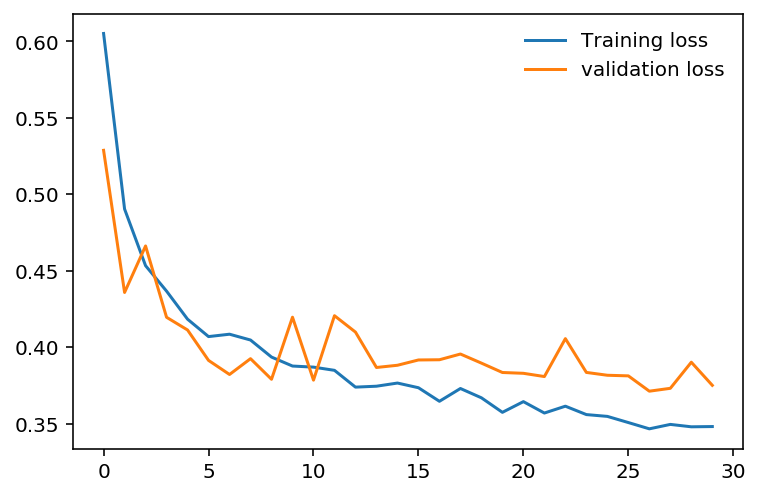

In [125]:
plt.plot(train_losses,label="Training loss")
plt.plot(test_losses,label = "validation loss")
plt.legend(frameon = False)

Epoch:1/30 Training loss: 0.605 Test Loss :0.529 Test ccuracy : 0.809
Epoch:2/30 Training loss: 0.490 Test Loss :0.436 Test ccuracy : 0.843
Epoch:3/30 Training loss: 0.453 Test Loss :0.466 Test ccuracy : 0.839
Epoch:4/30 Training loss: 0.437 Test Loss :0.420 Test ccuracy : 0.847
Epoch:5/30 Training loss: 0.418 Test Loss :0.411 Test ccuracy : 0.852
Epoch:6/30 Training loss: 0.407 Test Loss :0.391 Test ccuracy : 0.863
Epoch:7/30 Training loss: 0.409 Test Loss :0.382 Test ccuracy : 0.863
Epoch:8/30 Training loss: 0.405 Test Loss :0.393 Test ccuracy : 0.860
Epoch:9/30 Training loss: 0.394 Test Loss :0.379 Test ccuracy : 0.868
Epoch:10/30 Training loss: 0.388 Test Loss :0.420 Test ccuracy : 0.858
Epoch:11/30 Training loss: 0.387 Test Loss :0.378 Test ccuracy : 0.867
Epoch:12/30 Training loss: 0.385 Test Loss :0.421 Test ccuracy : 0.863
Epoch:13/30 Training loss: 0.374 Test Loss :0.410 Test ccuracy : 0.865
Epoch:14/30 Training loss: 0.374 Test Loss :0.387 Test ccuracy : 0.866
Epoch:15/30 Tra

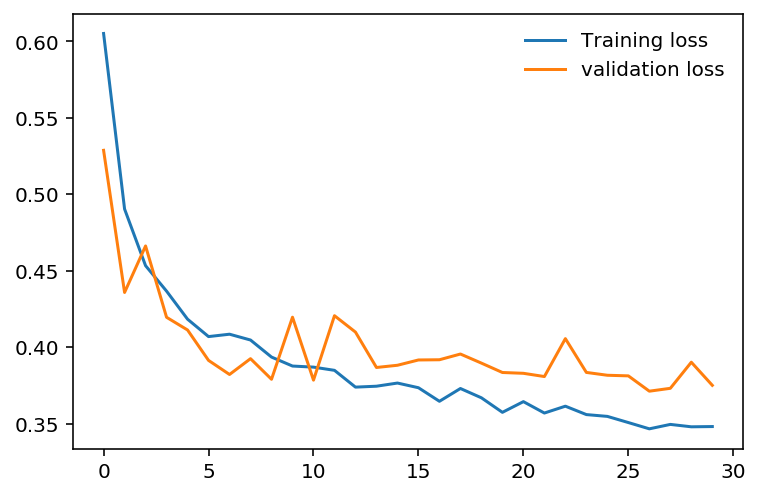

In [123]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.003)

epoch = 30 
train_losses, test_losses = [], []
for i in range(epoch):
    running_loss =0
    for images,labels in trainloader:
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                logos = model(images)
                test_loss += criterion(logos,labels)
                
                ps = torch.exp(logos)
                top_p,top_class = ps.topk(1,dim=1)
                equal = top_class ==  labels.view(*top_class.shape)
                accuracy += torch.mean(equal.type(torch.FloatTensor))
            model.train()
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch:{}/{}".format(i+1,epoch),
              "Training loss: {:.3f}".format(running_loss/len(trainloader)),
              "Test Loss :{:.3f}".format(test_loss/len(testloader)),
              "Test ccuracy : {:.3f}".format(accuracy/len(testloader))
             )
        
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
plt.plot(train_losses,label="Training loss")
plt.plot(test_losses,label = "validation loss")
plt.legend(frameon = False)
        

IndexError: index 16 is out of bounds for dimension 0 with size 16

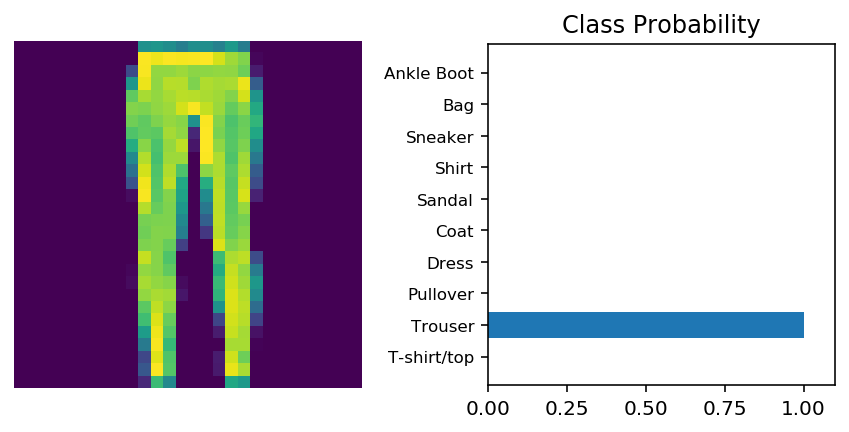

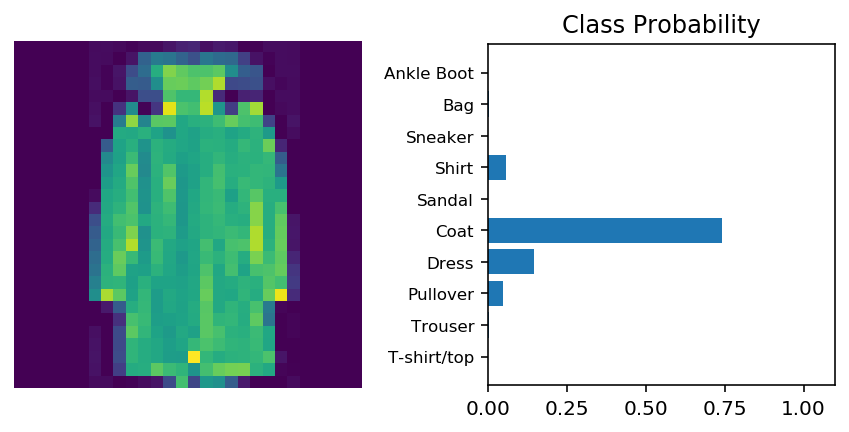

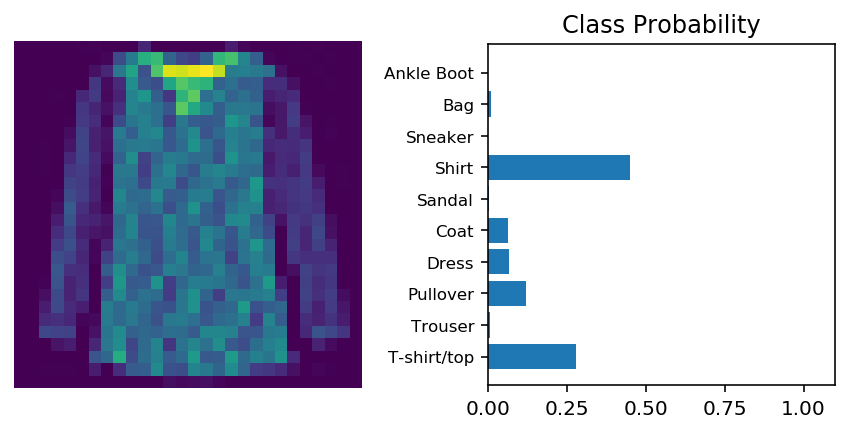

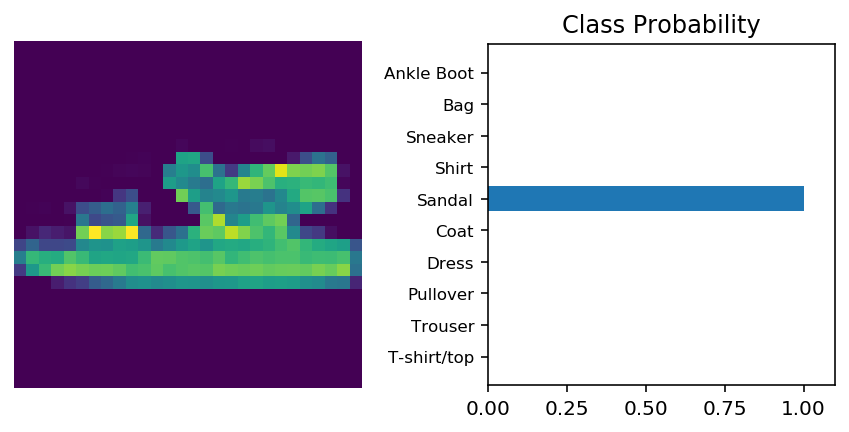

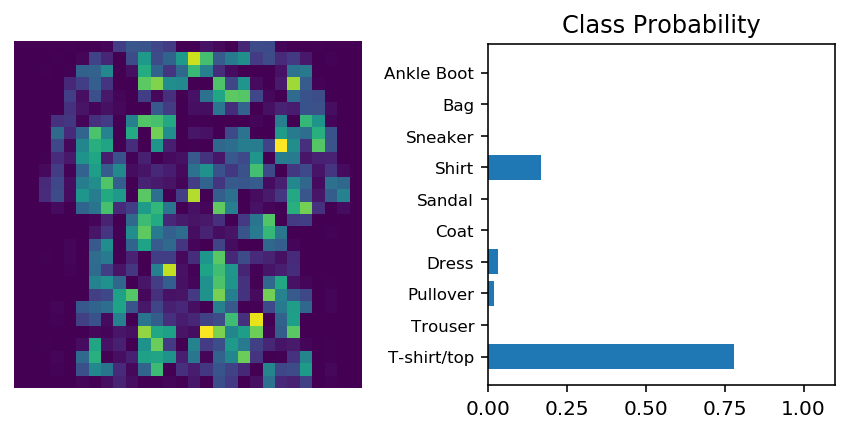

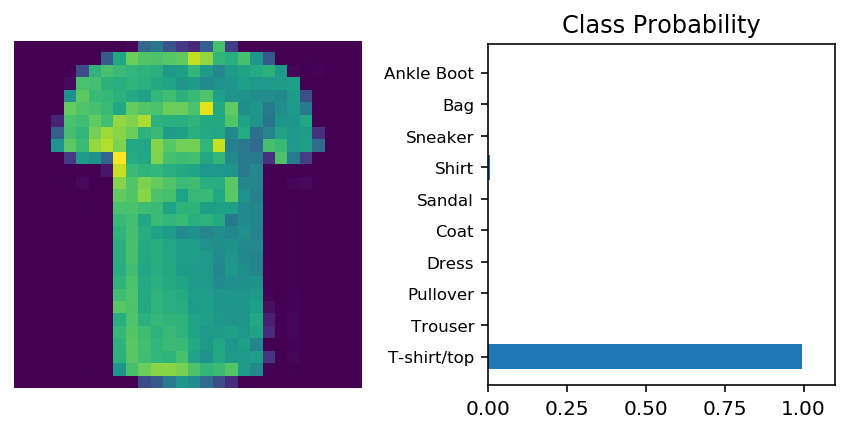

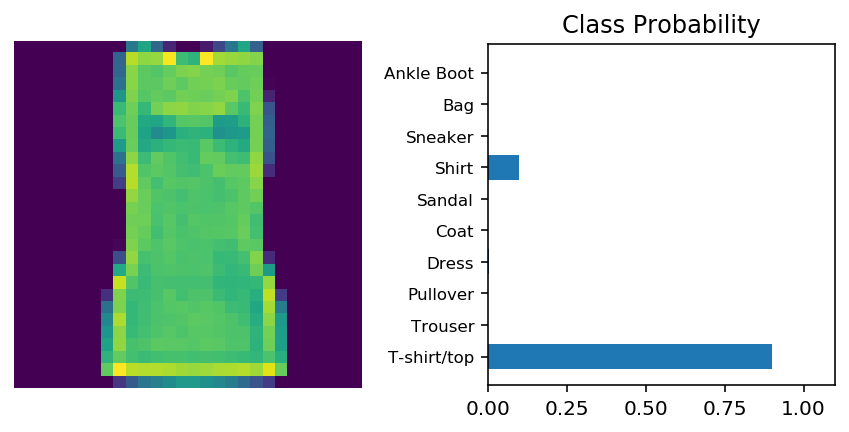

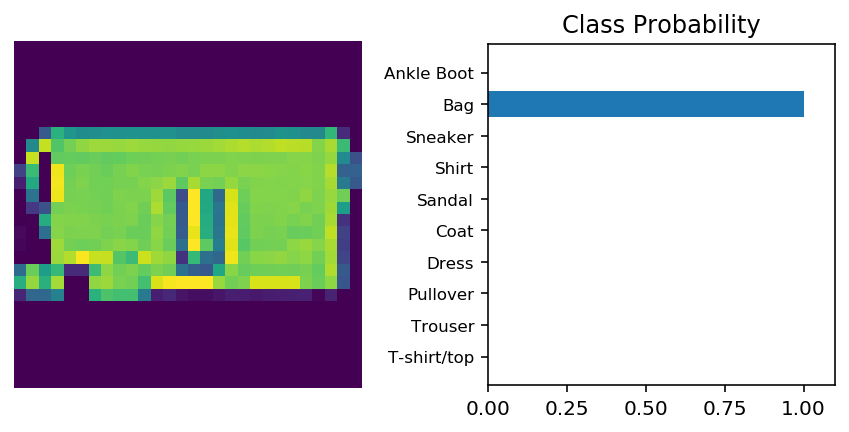

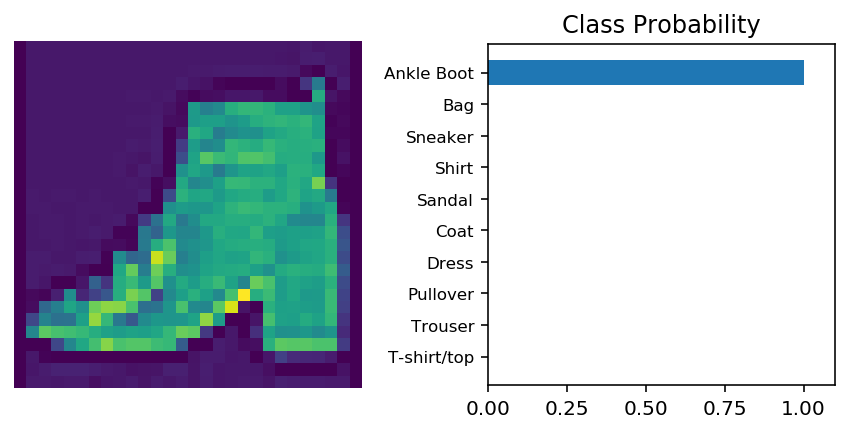

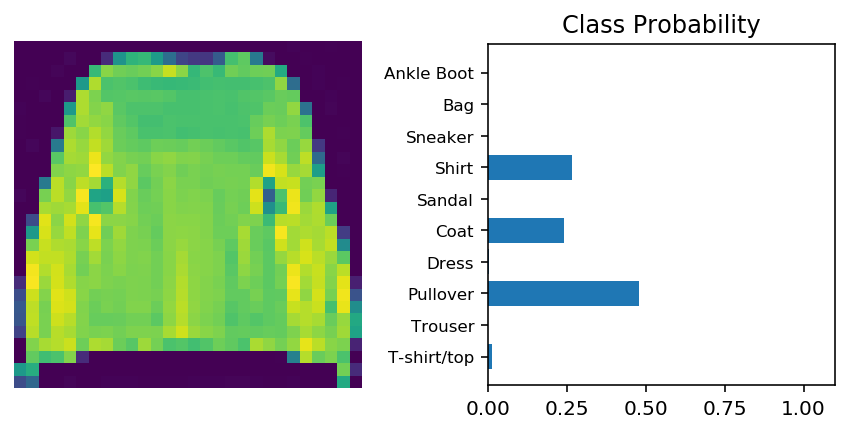

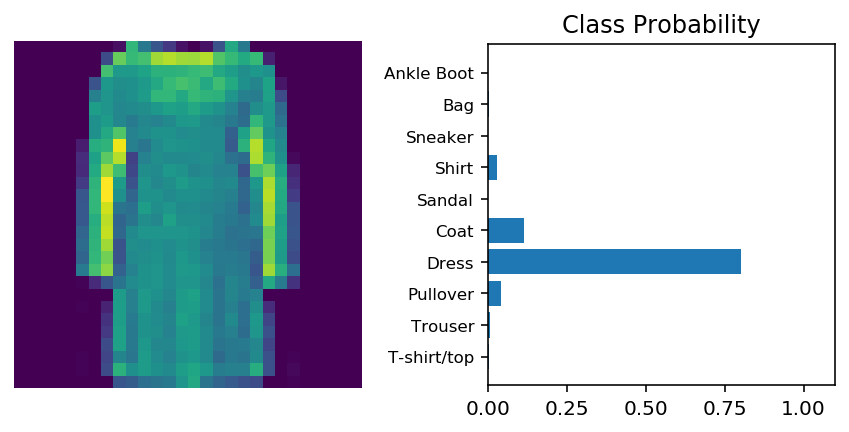

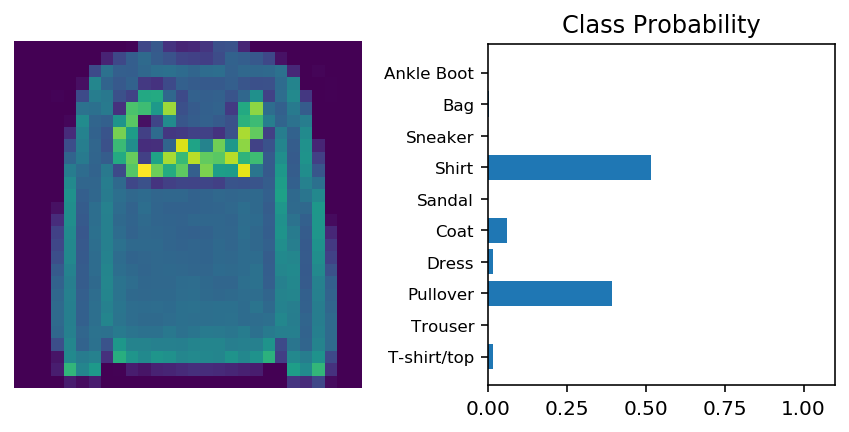

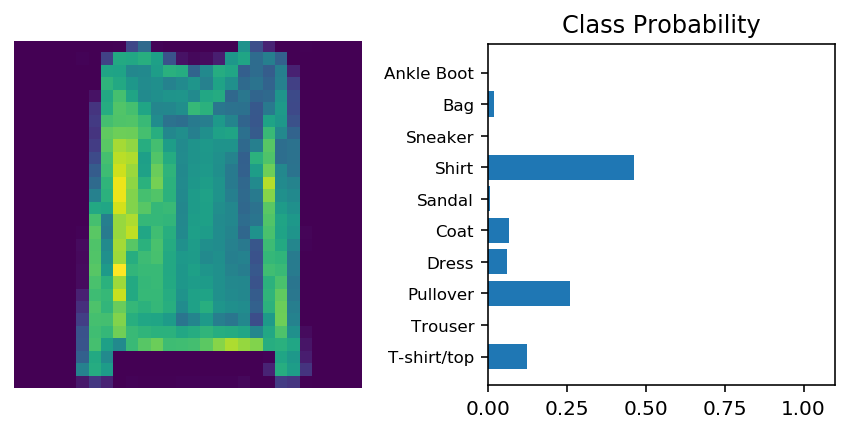

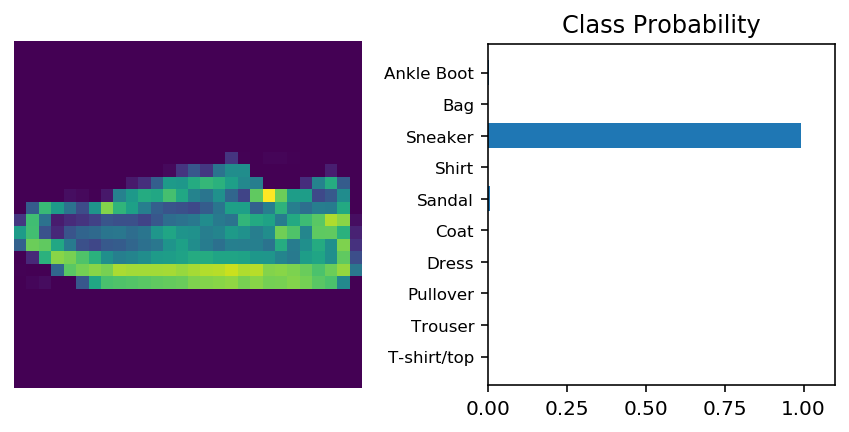

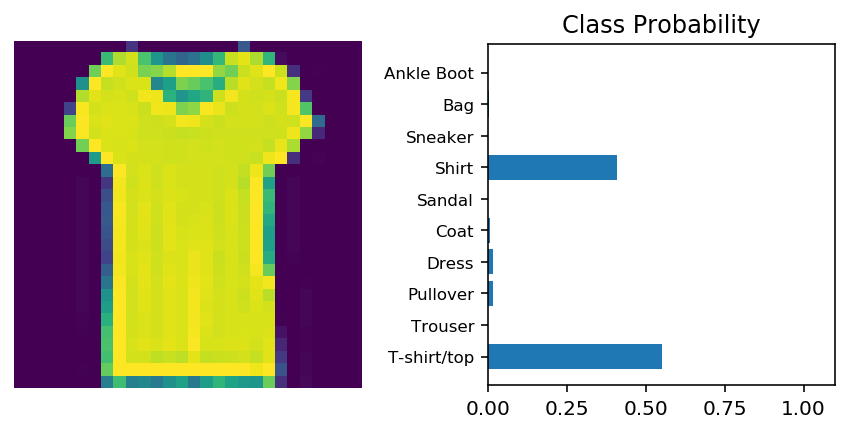

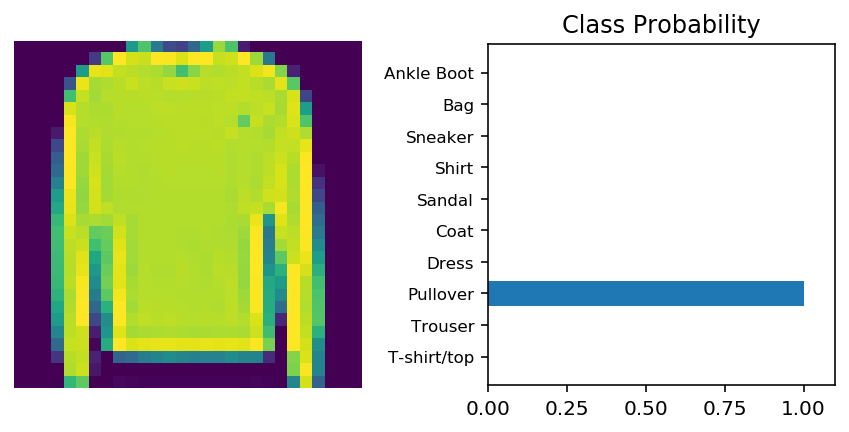

In [124]:
%matplotlib inline
import helper
i=0
model.eval()
while i<64:
    img = images[i].view(1,784)
    with torch.no_grad():
        logos=model(img)
    ps = torch.exp(logos)
    helper.view_classify(img.view(1,28,28),ps,version ='Fashion')
    i+=1

In [126]:
print(model.state_dict().keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])
